### American Citizens Annual Income Analysis.
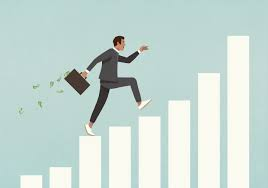
Income distribution in the United States varies widely based on factors like age, education, location, and occupation. Key summary statistics include the mean (average income), median (middle income value), mode (most common income category), standard deviation (dispersion of incomes), quartiles (dividing data into four equal parts), Gini coefficient (measure of income inequality), and the poverty rate (percentage living below the poverty line). For recent and specific datasets, reliable sources like the U.S. Census Bureau and Bureau of Labor Statistics provide comprehensive income-related statistics and reports. Understanding income distribution helps policymakers and researchers address economic disparities and formulate targeted interventions for socioeconomic development.

#### About dataset:
1. Age: The age of the individual.
2. Workclass: The type of employer or employment status (e.g., private, government, self-employed, etc.).
3. Education: The highest level of education attained by the individual (e.g., high school, Bachelor's, Master's, etc.).
4. Education.num: Numerical encoding of education level (optional, as a more granular representation of education).
5. Occupation: The specific job or profession of the individual.
6. Relationship: The relationship status of the individual in the household (e.g., husband, wife, not-in-family, etc.).
7. Race: The race or ethnicity of the individual (e.g., White, Black, Asian, etc.).
8. Sex: The gender of the individual (e.g., Male or Female).
9. Marital.status: The marital status of the individual (e.g., Married, Divorced, Single, etc.).
10. Capital.gain: The amount of capital gains reported by the individual.
11. Capital.loss: The amount of capital losses reported by the individual.
12. Hours.per.week: The number of hours worked per week by the individual.
13. Native.country: The country of origin or nationality of the individual.
14. Income: The target variable representing whether the individual's income is less or greater than a specific threshold (e.g., 50k).

## Objective:
The objective of the dataset on American citizens' annual income is to study and analyze the income distribution and related factors among individuals in the United States. The dataset aims to provide insights into the demographics, education, occupation, work class, and other relevant features of individuals, and how these attributes are associated with their annual income. By examining this data, researchers or analysts can identify trends, disparities, and factors that contribute to varying income levels in the population. The dataset could be used to build predictive models, draw statistical inferences, or conduct further research on income inequality, employment patterns, and socioeconomic conditions in the United States.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

mako_r = sns.color_palette("mako_r")

## Load dataset

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\archive (2)\income.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [4]:
# check data size
df.shape

(25000, 15)

In [5]:
# uniques values as per the columns
for i in df.columns:
    print("--"*37)
    print(i,":-")
    print(df[i].unique())

--------------------------------------------------------------------------
age :-
[40 30 46 32 54 63 25 71 37 44 21 18 33 29 58 42 45 62 26 36 53 34 39 52
 23 22 48 28 60 61 27 19 55 70 38 51 43 65 17 56 41 47 24 20 31 49 57 35
 50 59 82 78 69 73 75 68 76 72 64 66 79 87 67 81 90 77 74 88 80 84 86 83
 85]
--------------------------------------------------------------------------
workclass :-
['Self-emp-not-inc' 'Private' '?' 'Local-gov' 'Self-emp-inc' 'State-gov'
 'Federal-gov' 'Without-pay' 'Never-worked']
--------------------------------------------------------------------------
fnlwgt :-
[223881 149118 109209 ... 278139 130834 420973]
--------------------------------------------------------------------------
education :-
['Prof-school' 'HS-grad' 'Some-college' 'Assoc-voc' 'Preschool' '7th-8th'
 '12th' 'Bachelors' 'Masters' '11th' '10th' 'Assoc-acdm' '1st-4th'
 'Doctorate' '9th' '5th-6th']
--------------------------------------------------------------------------
education.num :-
[15 

In [6]:
# check duplicate values
df.duplicated().sum()

12

In [7]:
# delete the duplicates values
df = df.drop_duplicates()
df.duplicated().sum()

0

## Missing values
how to deal with missing values, you have tree option.

2. Get rid of the missing data points
3.delete the mising values columns and row.
4. Set the values of some value( mean ,meadian, mode).

In [8]:
#check null values in my case not a missing values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24988 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             24988 non-null  int64 
 1   workclass       24988 non-null  object
 2   fnlwgt          24988 non-null  int64 
 3   education       24988 non-null  object
 4   education.num   24988 non-null  int64 
 5   marital.status  24988 non-null  object
 6   occupation      24988 non-null  object
 7   relationship    24988 non-null  object
 8   race            24988 non-null  object
 9   sex             24988 non-null  object
 10  capital.gain    24988 non-null  int64 
 11  capital.loss    24988 non-null  int64 
 12  hours.per.week  24988 non-null  int64 
 13  native.country  24988 non-null  object
 14  income          24988 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.1+ MB


## Obsarvation:
1. Insight of dataset: it is 15 columns as types columns are dtypes: int64(6), object(9).

## Getting the statistical summary of dataset

In [10]:
# describe the categrocal values
df.describe(include="object").T

,count,unique,top,freq
workclass,24988,9,Private,17459
education,24988,16,HS-grad,8021
marital.status,24988,7,Married-civ-spouse,11516
occupation,24988,15,Prof-specialty,3196
relationship,24988,6,Husband,10144
race,24988,5,White,21319
sex,24988,2,Male,16710
native.country,24988,41,United-States,22406
income,24988,2,<=50K,18943


In [11]:
# describe the numric values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,24988.0,38.612214,13.682532,17.0,28.0,37.0,48.0,90.0
fnlwgt,24988.0,189677.743077,105477.206096,12285.0,117996.5,178218.5,237054.5,1484705.0
education.num,24988.0,10.077277,2.575997,1.0,9.0,10.0,12.0,16.0
capital.gain,24988.0,1083.664199,7323.691060,0.0,0.0,0.0,0.0,99999.0
capital.loss,24988.0,87.531815,402.922400,0.0,0.0,0.0,0.0,4356.0
hours.per.week,24988.0,40.445214,12.309125,1.0,40.0,40.0,45.0,99.0


## Data Preprocessing

In [12]:
#for i in df.columns:
#  print("--"*50)
#  print(i)
#   print("-"*25)
#   print(df[i].value_counts())

In [13]:
# replace ? to other 
df = df.replace("?","Other")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,Other,148657,Preschool,1,Married-civ-spouse,Other,Wife,White,Female,0,0,40,Mexico,<=50K


In [14]:
# change education types
df["education"].unique()

array(['Prof-school', 'HS-grad', 'Some-college', 'Assoc-voc', 'Preschool',
       '7th-8th', '12th', 'Bachelors', 'Masters', '11th', '10th',
       'Assoc-acdm', '1st-4th', 'Doctorate', '9th', '5th-6th'],
      dtype=object)

In [15]:
# change education types
df["education"] = df["education"].replace({"5th-6th":"Elementary School","7th-8th":"middle school",
                                          "12th":"high school","11th":"high school",
                                          "10th":"high school","9th":"high school",
                                          "1st-4th":"Elementary School","Prof-school":"Professional school",
                                          "HS-grad":"High School Graduate","Assoc-vo":"Professional school",
                                          "Assoc-acdm":"Professional school"})

In [16]:
# change education types
df["education"] = df["education"].replace({'High School Graduate':"Bachelors",'Assoc-voc':"Professional school",})

In [17]:
df["education"].unique()

array(['Professional school', 'Bachelors', 'Some-college', 'Preschool',
       'middle school', 'high school', 'Masters', 'Elementary School',
       'Doctorate'], dtype=object)

In [18]:
df["occupation"] = df["occupation"].replace({"Other":"Other-service"})

In [19]:
df["workclass"].unique()

array(['Self-emp-not-inc', 'Private', 'Other', 'Local-gov',
       'Self-emp-inc', 'State-gov', 'Federal-gov', 'Without-pay',
       'Never-worked'], dtype=object)

In [20]:
# change the income column as a <=50k income is 0 and >=50 is 1
df["income"] = df["income"].replace({"<=50K":0,">50K":1})

In [21]:
# after procsesing data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Professional school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,1
1,30,Private,149118,Bachelors,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,0
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,1
3,32,Private,229566,Professional school,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,1
4,54,Other,148657,Preschool,1,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,Mexico,0


In [22]:
# find the categorical columns names
cat = df.describe(include="object").columns
cat

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [23]:
# find the numeric columns header name
num = df.describe().columns
num

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

## Data Visualization

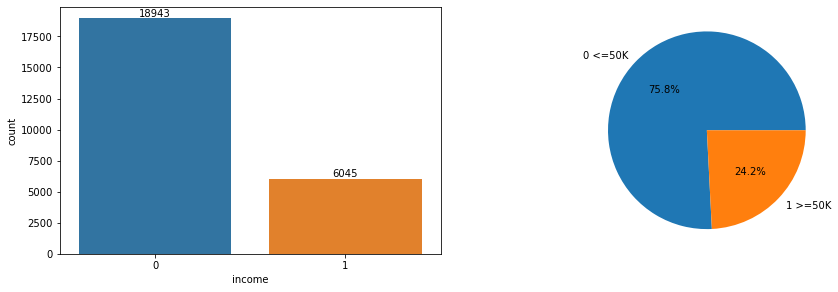

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)  
ax = sns.countplot(data=df,x="income")
#plt.xticks(rotation=65)
for i in ax.containers:
    ax.bar_label(i)
    
plt.subplot(2,2,2)
plt.pie(df["income"].value_counts(),labels=["0 <=50K","1 >=50K"],autopct="%0.01f%%")
plt.show()

# Observation:
1. Insight into the income column: Approximately 75% of American citizens have incomes less than 50k, while around 24% have incomes greater than 50k.

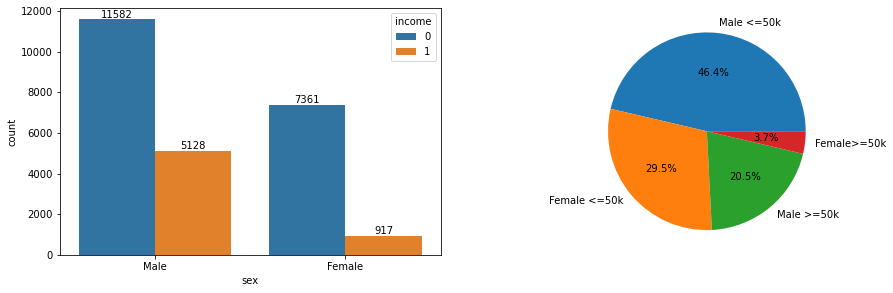

In [25]:
# visualize income columns and find the insight of the columns 
c = sns.color_palette(n_colors=4)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1) 
ax = sns.countplot(data=df,x="sex",hue="income")
#plt.xticks(rotation=65)
for i in ax.containers:
    ax.bar_label(i)
    
plt.subplot(2,2,2)
plt.pie(df["sex"].groupby(df["income"]).value_counts(),
        colors=c,labels=["Male <=50k","Female <=50k","Male >=50k","Female>=50k"],autopct="%0.01f%%")
plt.show()

## Obervation:
1. Insight into the sex column: Approximately 46% of males have an income less than 50k, while females with income less than 50k account for approximately 29%. Approximately 20% of males have an income greter than 50k, while females with income greter than 50k account for approximately 29%.

[<BarContainer object of 10 artists>, <BarContainer object of 10 artists>]


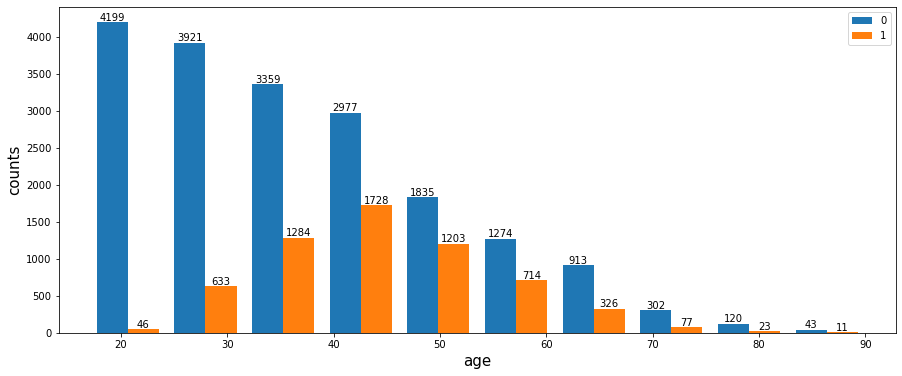

In [26]:
a = df.loc[df["income"]==0,"age"]
b = df.loc[df["income"]==1,"age"]


fig ,ax = plt.subplots(figsize=(15,6))
ax.hist([a,b],label=[0,1])

con = ax.containers
print(con)

[f'ax.{fn}' for fn in dir(ax) if 'contain' in fn.lower()]

for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("age",size=15)
    plt.ylabel("counts",size=15)
    plt.legend()

## Observation:
1. Insight from the Age column: The majority of individuals within the age range of 20 to 40 have a salary less than 50k, whereas those between the ages of 40 to 50 have a salary higher than 50k.

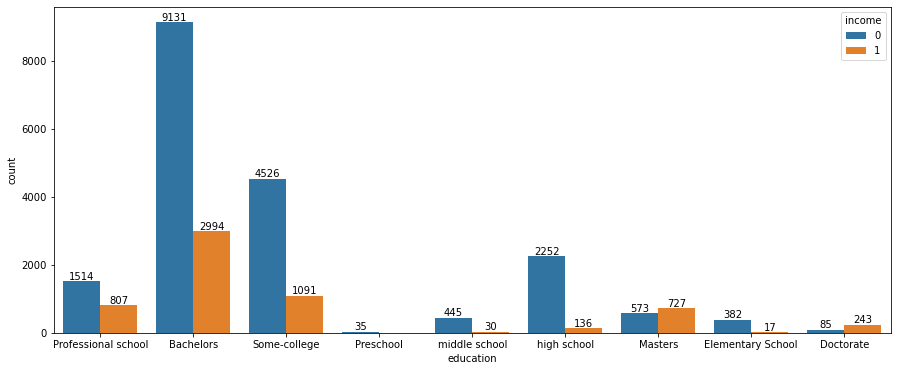

In [27]:
plt.figure(figsize=(15,6))
ax1 = sns.countplot(data=df,x="education",hue="income")
#plt.xticks(rotation=65)
for k in ax1.containers:
    ax1.bar_label(k)

## Observation:
1. Insight from the Education column: The majority of individuals earning less than 50k salary have completed their education up to the level of Bachelor's degree, while those earning greater than 50k salary mostly have completed their education up to the level of Bachelor's degree, with some individuals having education up to the level of college.

[<BarContainer object of 10 artists>, <BarContainer object of 10 artists>]


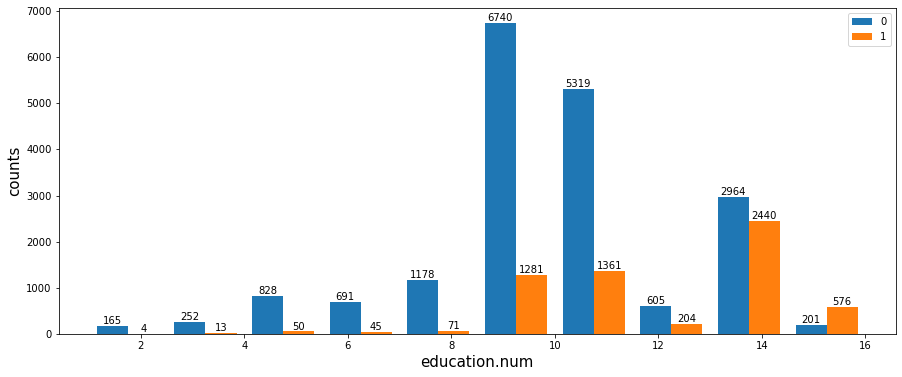

In [28]:
a_4 = df.loc[df["income"]==0,"education.num"]
b_4 = df.loc[df["income"]==1,"education.num"]
fig ,ax = plt.subplots(figsize=(15,6))
ax.hist([a_4,b_4],label=[0,1])

con = ax.containers
print(con)

[f'ax.{fn}' for fn in dir(ax) if 'contain' in fn.lower()]

for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("education.num",size=15)
    plt.ylabel("counts",size=15)
    plt.legend()

## Observation:
1. insight of the education.num column likely encodes individuals' education levels numerically, higher values representing higher education, and lower values corresponding to lower education levels, providing more granularity than categorical "education" column.

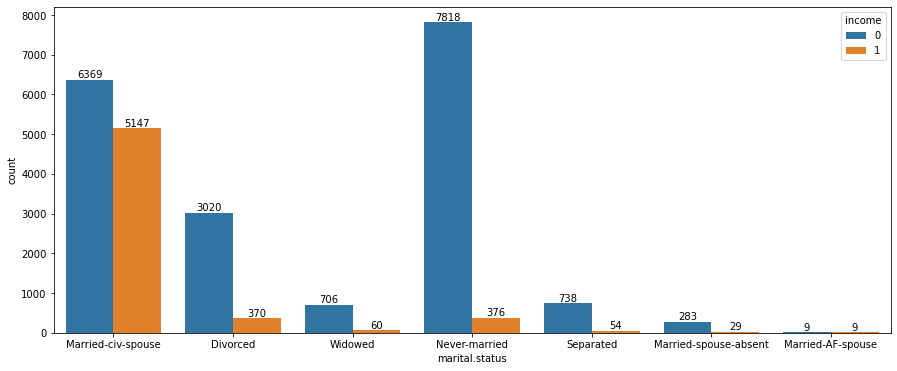

In [29]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df,x="marital.status",hue="income")
#plt.xticks(rotation=65)
for i in ax.containers:
    ax.bar_label(i)


## Observation:
1. Insight from the marital.status column: Among individuals with a salary less than 50k, the majority are unmarried (approximately 7818 individuals) and a significant number are married (around 6369 individuals). On the other hand, among individuals with a salary greater than 50k, most of them are married.

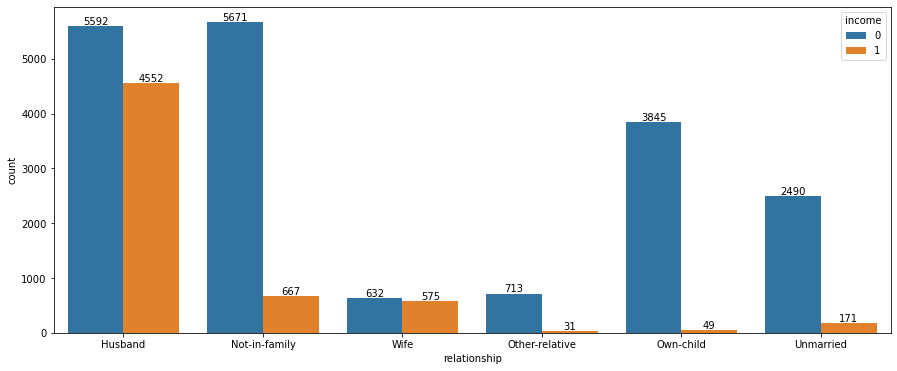

In [30]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df,x="relationship",hue="income")
#plt.xticks(rotation=65)
for i in ax.containers:
    ax.bar_label(i)


## Observation:
1.Insight from the Relationship column: In most cases, individuals who are either married or not in a family relationship tend   to have a salary less than 50k. However, among those with a salary greater than 50k, the majority are married individuals,     with a significant portion being married husbands (approximately 4552 individuals).

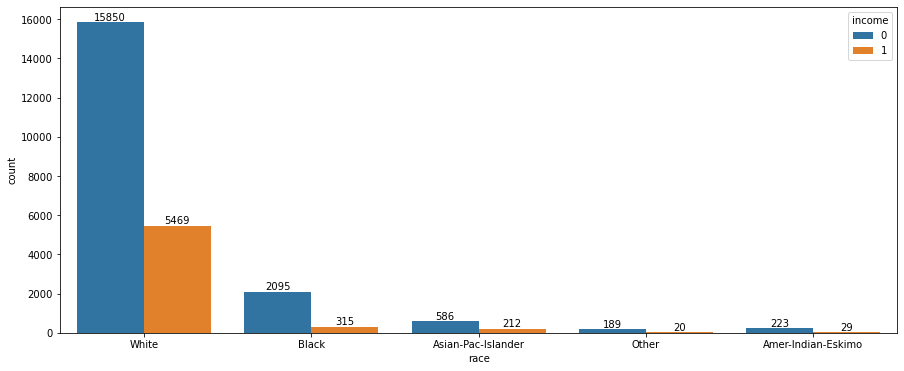

In [31]:
plt.figure(figsize=(15,6))
ax1 = sns.countplot(data=df,x="race",hue="income")
#plt.xticks(rotation=50)
for k in ax1.containers:
    ax1.bar_label(k)

## Observation:
1. Insight from the race column: The majority of individuals with a salary less than 50k belong to the White race. Similarly, among those with a salary greater than 50k, there are approximately 5469 individuals who also belong to the White race.

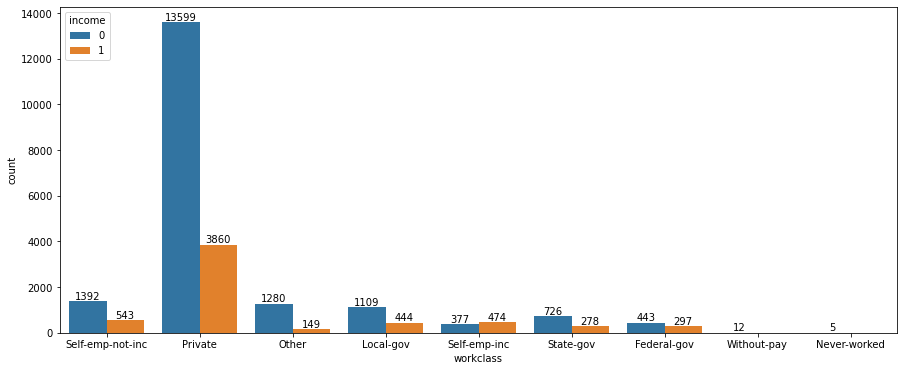

In [32]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df,x="workclass",hue="income")
#plt.xticks(rotation=65)
for i in ax.containers:
    ax.bar_label(i)

## Observation:
1. Insight from the workclass column: The majority of individuals earning less than 50k salary work in the private sector, totaling around 13599 people. On the other hand, there are approximately 3860 individuals who work in the private sector and earn a salary greater than 50k.

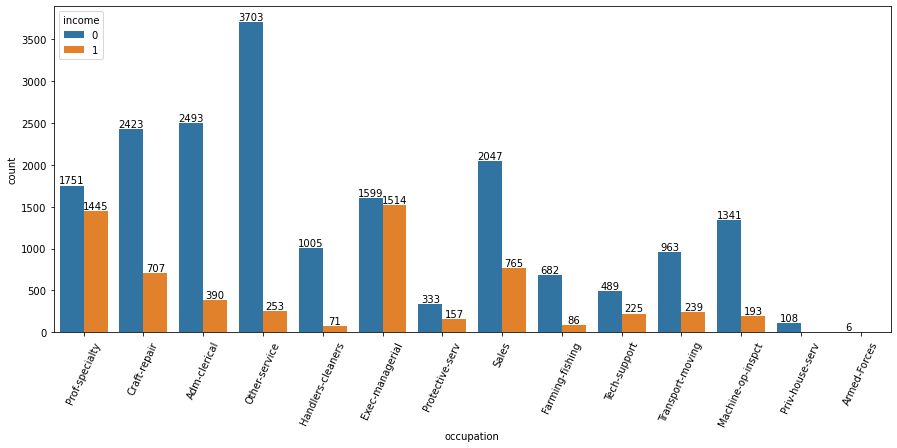

In [33]:
plt.figure(figsize=(15,6))
ax1 = sns.countplot(data=df,x="occupation",hue="income")
plt.xticks(rotation=65)
for k in ax1.containers:
    ax1.bar_label(k)

## observation:
1. Insight from the occupation column: The majority of individuals earning less than 50k salary are in the occupation category of "Other service." On the other hand, among those earning a salary greater than 50k, the majority work in professional specialty occupations or executive-managerial positions..

[<BarContainer object of 10 artists>, <BarContainer object of 10 artists>]


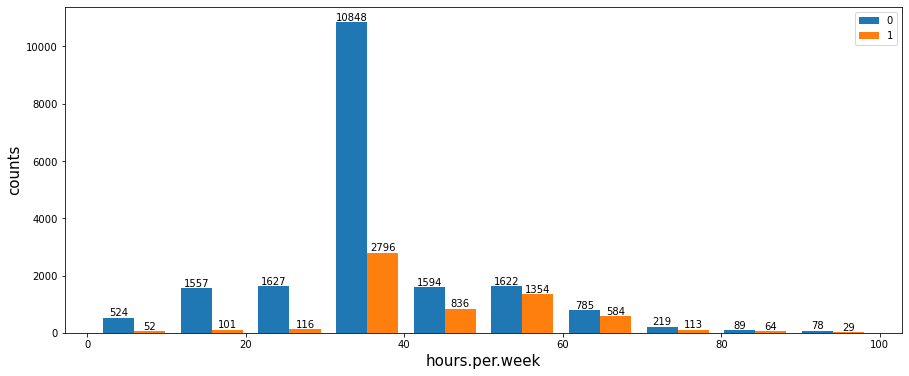

In [34]:
a_12 = df.loc[df["income"]==0,"hours.per.week"]
b_12 = df.loc[df["income"]==1,"hours.per.week"]


fig ,ax = plt.subplots(figsize=(15,6))
ax.hist([a_12,b_12],label=[0,1])

con = ax.containers
print(con)

[f'ax.{fn}' for fn in dir(ax) if 'contain' in fn.lower()]

for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("hours.per.week",size=15)
    plt.ylabel("counts",size=15)
    plt.legend()

## Observation:
1. Insight from the total working hours per week column: For both salary ranges, the majority of individuals work 40 hours per week. Whether earning less than 50k or greater than 50k, most people seem to have a standard workweek of 40 hours.

[<BarContainer object of 10 artists>, <BarContainer object of 10 artists>]


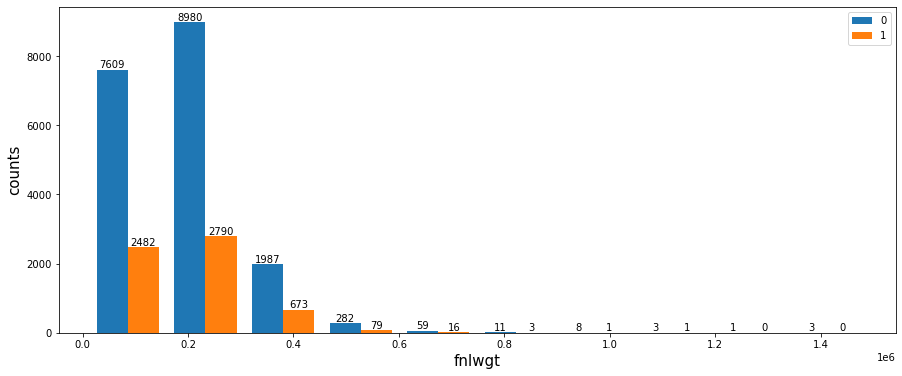

In [35]:
a_3 = df.loc[df["income"]==0,"fnlwgt"]
b_3 = df.loc[df["income"]==1,"fnlwgt"]


fig ,ax = plt.subplots(figsize=(15,6))
ax.hist([a_3,b_3],label=[0,1])

con = ax.containers
print(con)

[f'ax.{fn}' for fn in dir(ax) if 'contain' in fn.lower()]

for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("fnlwgt",size=15)
    plt.ylabel("counts",size=15)
    plt.legend()

## Observation:
1. Insight from the "fnlwgt" column: The "fnlwgt" represents statistical weight for sample data, commonly around 0.2, ensuring representation of population characteristics in the dataset.

[<BarContainer object of 10 artists>, <BarContainer object of 10 artists>]


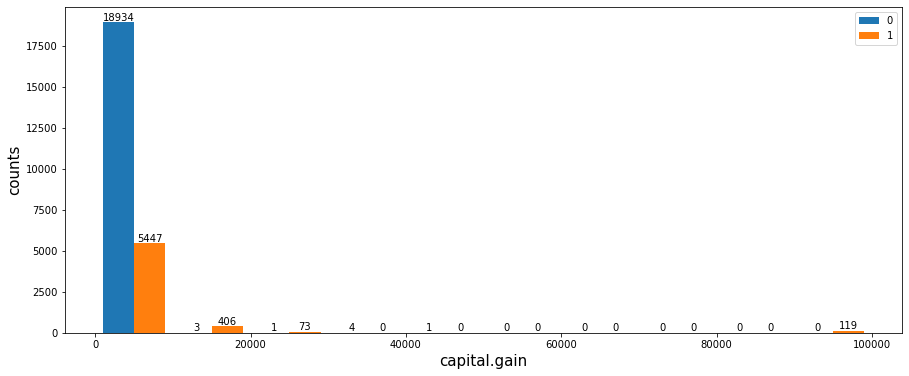

In [36]:
a_a = df.loc[df["income"]==0,"capital.gain"]
b_b = df.loc[df["income"]==1,"capital.gain"]


fig ,ax = plt.subplots(figsize=(15,6))
ax.hist([a_a,b_b],label=[0,1])

con = ax.containers
print(con)

[f'ax.{fn}' for fn in dir(ax) if 'contain' in fn.lower()]

for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("capital.gain",size=15)
    plt.ylabel("counts",size=15)
    plt.legend()

## Observation:
1. Insight from the capital.gain column: The majority of individuals in working professions have no capital gain. However, some people have capital gains ranging around 404 (between 20000 to 100000), while around 119 individuals have capital gains exceeding 100000.

[<BarContainer object of 10 artists>, <BarContainer object of 10 artists>]


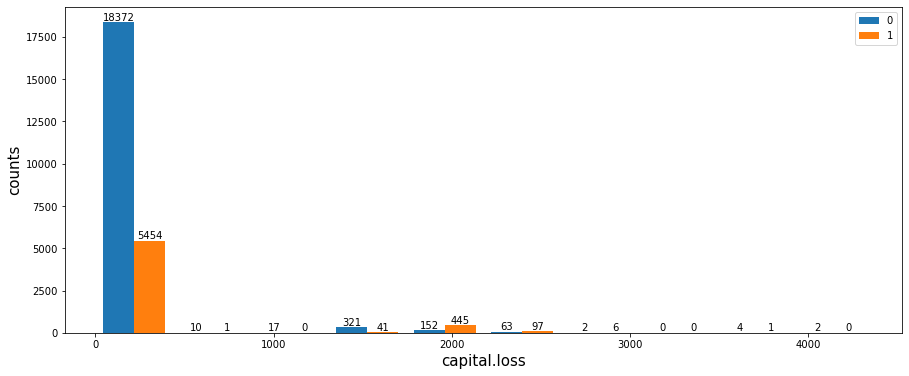

In [37]:
a_d = df.loc[df["income"]==0,"capital.loss"]
b_c = df.loc[df["income"]==1,"capital.loss"]


fig ,ax = plt.subplots(figsize=(15,6))
ax.hist([a_d,b_c],label=[0,1])

con = ax.containers
print(con)

[f'ax.{fn}' for fn in dir(ax) if 'contain' in fn.lower()]

for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("capital.loss",size=15)
    plt.ylabel("counts",size=15)
    plt.legend()

## Observation:
1. Insight from the capital.loss column: Some individuals experience capital losses, primarily falling within the range of 1000 or 2000. These losses are most commonly observed among the dataset.

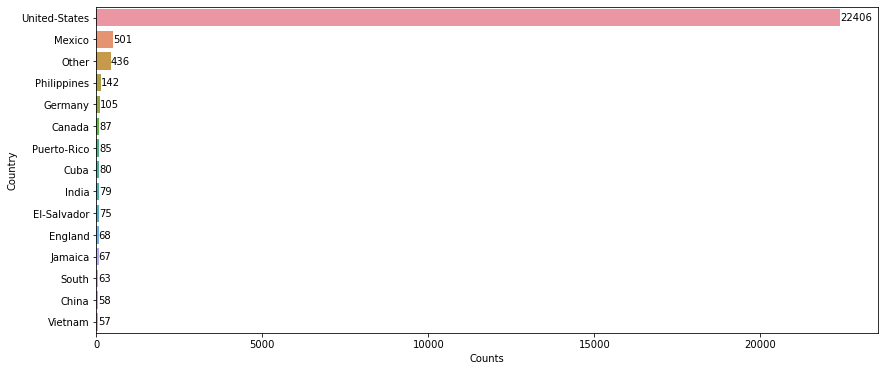

In [38]:
country = df["native.country"].value_counts()
country = pd.DataFrame(country).reset_index()
plt.figure(figsize=(14,6))
ax = sns.barplot(y = country["index"][:15],x=country["native.country"][:15])
plt.ylabel("Country")
plt.xlabel("Counts")

for i in ax.containers:
    ax.bar_label(i)

## Observation: 
1.Insight from the Native.country column: The majority of working individuals in the dataset belong to the United States, totaling approximately 22406 people.

## Final Summary:
The dataset provides valuable insights into various aspects of the population. It reveals that approximately 75% of American citizens earn incomes less than 50k, while about 24% have incomes greater than 50k. Gender-wise, a higher percentage of males (46%) earn less than 50k compared to females (29%), whereas around 20% of males and females earn more than 50k. Age-wise, individuals between 20 to 40 years tend to earn less than 50k, while those aged 40 to 50 have higher incomes. Education-wise, most individuals earning less or greater than 50k have completed their Bachelor's degree. The dataset also indicates that the majority work in the private sector, with 40-hour workweeks. It is predominantly representative of the United States population.